In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics
#%matplotlib notebook

### Write fonksiyonu

In [2]:
def mypgmwrite(filename,data):
    magic_number = "P5"
    max_val = 255
    height = len(data)
    width = len(data[0])
    header = f'{magic_number}\n{str(width)} {str(height)}\n{str(max_val)}\n'
    
    with open(filename,'wb') as f:#write binary olarak dosyayı açtım, bu sayede pgm dosyasına binary yazabiliyorum.
        f.write(header.encode())#Encode ile stringleri UTF-8 veya başka bir kodlama tekniğiyle kodlar.
        for i in range(height):
            for j in range(width):
                f.write(int(data[i][j]).to_bytes(1,'big'))#1 byte 0-255 arası olduğu için 1 byte a çeviriyoruz. Maxval 255 olmasaydı bu da farklı olurdu.

### Read fonksiyonu

In [3]:
def mypgmread(filename):
    with open(filename,'rb') as f:#write binary olarak dosyayı açtım, bu sayede pgm dosyasına binary yazabiliyorum.
        magic_word = f.readline().strip().decode() #Magicword. Strip metodu ile stringin başında ve sonundaki boşlukları kaldırıyoruz.
        comment = '#'
        f_content = f.readline().decode()
        while(f_content[0] == '#'):#Yorum satırlarını ayırt etmek için.
            f_content = f.readline()
#split metodu default olarak stringi boşluklardan ayırır. kelime kelime listeler.
        [width,height] = f_content.split()
        width = int(width)
        height = int(height)
        maxval = f.readline().decode()
        maxval = int(maxval)
        #print(magic_word)
        #print(f'width: {width}, height: {height}')
       # print(maxval)
        i = 0
        j = 0
        imgValue = [[0 for i in range(width)] for j in range(height)]
        byte = f.read(1)
        counter = 0
        while(counter != width*height):
            #print(f'i = {i}\nj = {j}')
            imgValue[i][j] = ord(byte)
            #print(f'byte {ord(byte)}')
            j += 1
            counter += 1
            if(j == width):
                i += 1
                j = 0
            byte = f.read(1)
    return magic_word,width,height,maxval,imgValue

### 3.4 Negatif alma

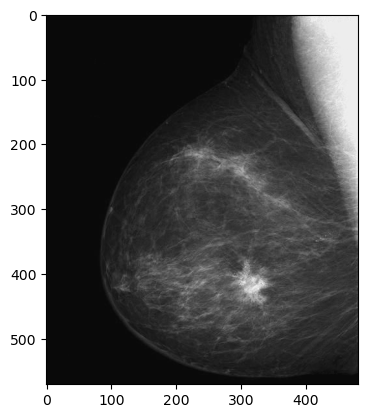

In [10]:
mw,width,height,maxval,data = mypgmread("fig0304.pgm")
plt.imshow(data,cmap="gray")

In [12]:
def myImageNegative(width,height,maxval,img):
    newImg = np.array(img) #diziyi numPy dizisine çevirdim bu sayede matristen skaler bir sayı çıkarabilirim.
    newImg = maxval-newImg
    return newImg
    

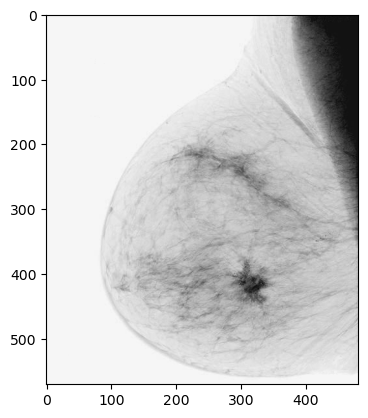

In [13]:
negativeImg = myImageNegative(width,height,maxval,data)
plt.imshow(negativeImg,cmap="gray")

### Maxval 255 olduğunda görüntünün piksellerini 255'ten çıkardığımızda görüntünün negatifi elde edilir. Parlak kısımlar koyu, koyu kısımlar parlak olarak görülmektedir. Mesela 0 olan bir piksel 255'ten çıkarıldığında sonuç 255 olacak. Yani başta karanlık olan piksel artık aydınlık olmuştur.

### 3.5 logaritmic transformation

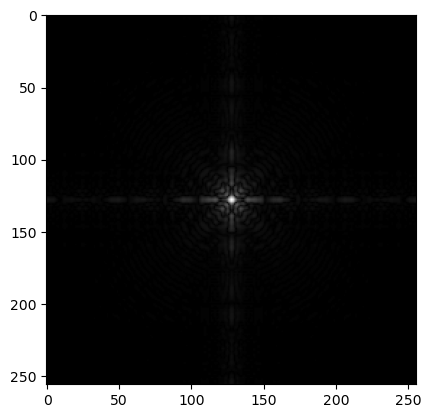

In [14]:
mw,width,height,maxval,data = mypgmread("fig0305.pgm")
plt.imshow(data,cmap="gray")

In [15]:
def myImageLog(width,height,img,c):
    newImg = np.array([[0 for i in range(width)] for i in range(height)],dtype=float)#Pikseller float değerlerde olabileceği için veri tipi float olarak belirlendi.
    for i in range(height):
        for j in range(width):
            newImg[i][j] = c*math.log10(img[i][j]+1)
    return newImg

### myImageLog fonksiyonunda newImg matrisini ilk başta np.array() fonksiyonu ile oluşturdum ancak dtype parametresi ile değerlerin float olacağını belirlemediğim için float olan değerleri integer olarak yazdı ve görüntü beklenenden farklı geldi. Daha sonra olması gereken görüntüde piksellerin float olarak geldiğini ancak benim oluşturduğum matriste float değer olmadığını farkedince problemi data tipi float olacak şekilde seçerek çözdüm.

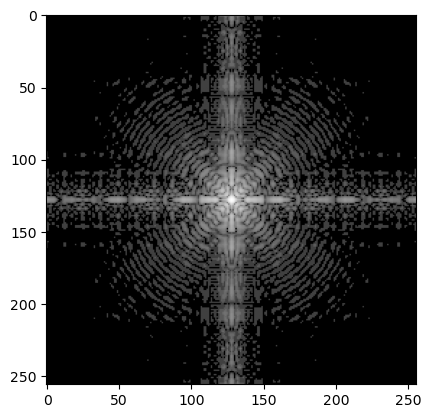

In [16]:
logImg = myImageLog(width,height,data,1)

plt.imshow(logImg,cmap="gray")

## Yukarıdaki görüntüde en yüksek pikselli değer 2.4 olmasına rağmen nasıl bu kadar parlak olduğunu anlayamadım. Bu yüzden belli pikselleri ilk ödevdeki lena.pgm de olduğu gibi değiştirerek inceledim ve aşağıdaki görüntü ortaya çıktı. Buradan anladığım fotoğrafta genel olarak pikseller 0,2.4 aralığında iken 2.4 çok parlak gözükürken başka piksellerin değerini bu maksimum değerden yüksek yapınca genel parlaklık yükseldiği için eskiden parlak olan o bölgeler artık daha karanlık gözüküyor.

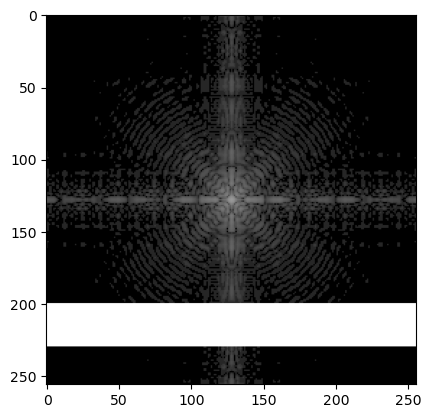

In [17]:
for i in range(200,230,1):
    for j in range(0,256,1):
        logImg[i][j] = 4
plt.imshow(logImg,cmap="gray")

### 3.8 Power-Law(Gamma) Transformation

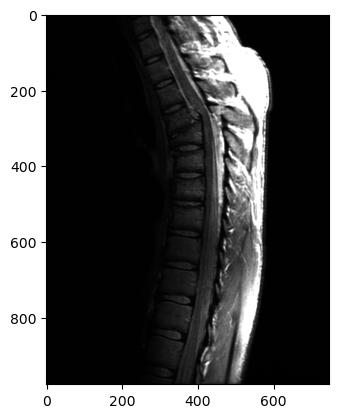

In [18]:
mw,width,height,maxval,data = mypgmread("fig0308.pgm")
plt.imshow(data,cmap="gray")

In [20]:
def myImageGamma(width,height,img,c,gamma):
    newImg = np.array([[0 for i in range(width)] for j in range(height)],dtype=float)
    for i in range(height):
        for j in range(width):
            newImg[i][j] = c*img[i][j]**gamma
    return newImg

Text(0.5, 1.0, 'c=1 gamma=0.6')

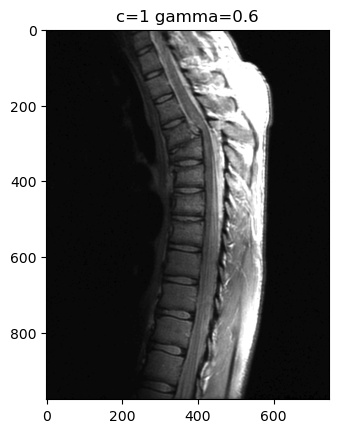

In [21]:
gammaImg = myImageGamma(width,height,data,1,0.6)
plt.imshow(gammaImg,cmap="gray")
plt.title("c=1 gamma=0.6")

Text(0.5, 1.0, 'c=1 gamma=0.4')

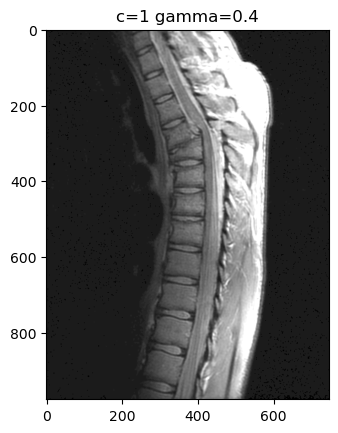

In [22]:
gammaImg = myImageGamma(width,height,data,1,0.4)
plt.imshow(gammaImg,cmap="gray")
plt.title("c=1 gamma=0.4")

Text(0.5, 1.0, 'c=1 gamma=0.3')

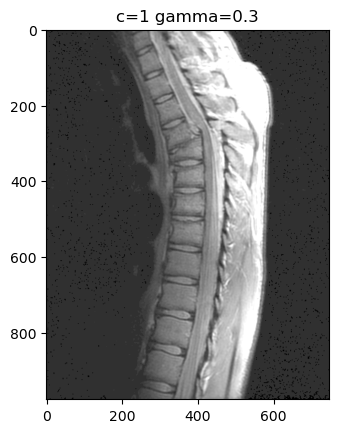

In [23]:
gammaImg = myImageGamma(width,height,data,1,0.3)
plt.imshow(gammaImg,cmap="gray")
plt.title("c=1 gamma=0.3")

### Karanlık kısımlar ağırlıklı iken gamma değerini kesirli seçersek(yanide 1'den küçük seçersek) yoğunluk seviyelerini genişletmiş olup detayları görmeye başlarız. Yani görüntü aydınlanmış olur. Eğer aydınlıklık kısımlar ağırlıklı ise gamma değerini 1 den büyük seçerek görüntüyü daha koyu hale getirebiliriz. Yukarıdaki fotoğraflarda da gamma değeri 1'den küçük olacak şekilde küçüldükçe görüntünün aydınlık kısımları genişlemektedir ve detaylar açığa çıkmaktadır.

### 3.3 Smoothing Spatial Filter

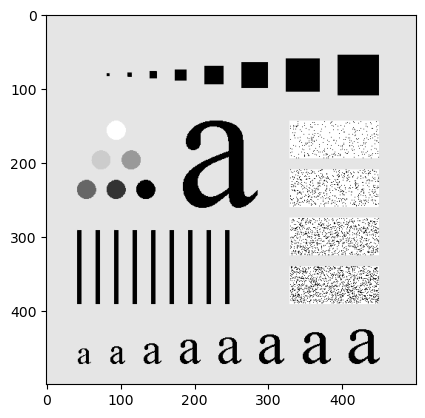

In [24]:
mw,width,height,maxval,data = mypgmread("fig0333.pgm")
plt.imshow(data,cmap="gray")

### Şekil 3.33'ün orijinal hali yukarıda görülmektedir.

In [25]:
def myImgCorrelation(width,height,img,m,n):
    mask = np.array([[1 for i in range(n)] for j in range(m)])
    temp = img
    a=(m-1)/2
    b=(n-1)/2
    filteredImg = np.array([[0 for i in range(width)] for j in range(height)])
    for i in range(height):
        for j in range(width):
            sum = 0
            
            for r in range(0,m,1):
                for s in range(0,n,1):
                    if i==0 and j==0: #Fotoğrafın en sol üst köşesi için
                        #Pikselleri gezen maskenin r ve s değerleri özel durumlarda m ve n değerlerinin yarısının aşağı yuvarlanmış 
                        #haliyle ilişkilidir. Bu ilişkiye göre if blokları aşağıda oluşturulmuştur. math.floor bu yüzden kullanıldı.
                        if r>=math.floor(m/2) and s>=math.floor(n/2):
                            sum = sum + mask[r][s]*img[i+r-math.floor(m/2)][j+s-math.floor(n/2)]
                        else:
                            sum = sum+0
                    elif i==0 and (j!=0 and j!=(width-1)): #görüntünün en üstteki pikselleri(en sol ve sağ üst köşeler hariç) için
                        if r>=math.floor(m/2) and (0 <j+s-math.floor(n/2)< width):
                            sum = sum + mask[r][s]*img[i+r-math.floor(m/2)][j+s-math.floor(n/2)]
                        else:
                            sum = sum+0
                    elif (i!=0 and i!=(height-1)) and j==0: #fotoğrafın en soldaki pikselleri için (en üst ve alt köşeler hariç)
                        if s>=math.floor(n/2) and (height>i+r-math.floor(m/2)>0):
                            sum = sum + mask[r][s]*img[i+r-math.floor(m/2)][j+s-math.floor(n/2)]
                        else:
                            sum = sum+0
                    elif i==0 and j==(width-1): #En sağ üst köşe için
                        if r>=math.floor(m/2) and s<=math.floor(n/2):
                            sum = sum + mask[r][s]*img[i+r-math.floor(m/2)][j+s-math.floor(n/2)]
                        else:
                            sum = sum+0
                    elif (height-1>i>0) and j==(width-1): #fotoğrafın en sağdaki pikselleri(en sağ üst ve alt köşe hariç)
                        if (s<=math.floor(n/2)) and (0<i+r-math.floor(m/2)<height):
                            sum = sum + mask[r][s]*img[i+r-math.floor(m/2)][j+s-math.floor(n/2)]
                        else:
                            sum = sum+0
                    elif i==(height-1) and j==(width-1):#fotoğrafın en sağ alt köşesi için
                        if r<=math.floor(m/2) and s<=math.floor(n/2):
                            sum = sum + mask[r][s]*img[i+r-math.floor(m/2)][j+s-math.floor(n/2)]
                        else:
                            sum = sum+0
                    elif  i==(height-1) and (0<j<width-1):#En alttaki pikseller (köşeler hariç)
                        if (r<=math.floor(m/2)) and (0<j+s-math.floor(n/2)<width):
                            sum = sum + mask[r][s]*img[i+r-math.floor(m/2)][j+s-math.floor(n/2)]
                        else:
                            sum = sum+0
                    elif i==(height-1) and width==0:
                        if r<=math.floor(m/2) and s>=math.floor(n/2):
                            sum = sum + mask[r][s]*img[i+r-math.floor(m/2)][j+s-math.floor(n/2)]
                        else:
                            sum = sum+0
                    elif (math.floor(m/2)<=i<(height-math.floor(m/2))) and (math.floor(n/2)<=j<(width-math.floor(n/2))):
                        sum = sum + mask[r][s]*img[i+r-math.floor(m/2)][j+s-math.floor(n/2)]
            filteredImg[i][j] = sum/9
    return filteredImg
                    

### Yukarıdaki fonksiyon teker teker fotoğrafın tüm köşeleri ve yan taraflarındaki pikselleri özel durum olarak kabul edip kontrol eder. Bundan dolayı döngü içinde birden çok if bloğu kullanılmıştır. Aşağıda fonksiyonun sonuçlarındaki çıktılar görülmektedir. Ancak m=15 için sonuçlanması yaklaşık 3 dakika ve m=35 için sonuçlanması 10 dakikadan fazla sürecek iterasyon işlemleri gerçekleşmektedir. Bu işlemi daha verimli bir şekilde halletmek için farklı bir mantıkla bir kaç hücre aşağıda görülen diğer myImgCorrelation fonksiyonunu yazdım. Bunun mantığı o fonksiyonun altında açıklanmıştır.

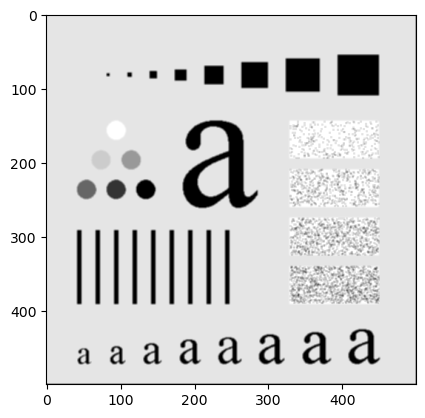

In [26]:
newData = myImgCorrelation(width,height,data,3,3)
plt.imshow(newData,cmap="gray")

### 3x3'lük bir Average filtresi uygulandığında siyah karelerin kenarları, a harflerinin kenarlarında hafif yumuşama görülmektedir. Kenarlardaki gürültülü kısımlar hafifletilmiştir.

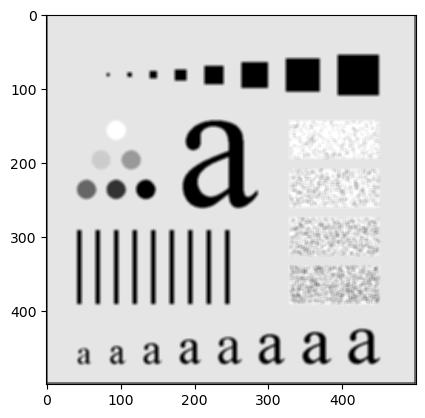

In [27]:
newData = myImgCorrelation(width,height,data,5,5)
plt.imshow(newData,cmap="gray")

### Yukarıdaki görüntü 5x5'lik average filtresi ile elde edilmiştir. Kenarlar daha fazla yumuşatılmıştır.

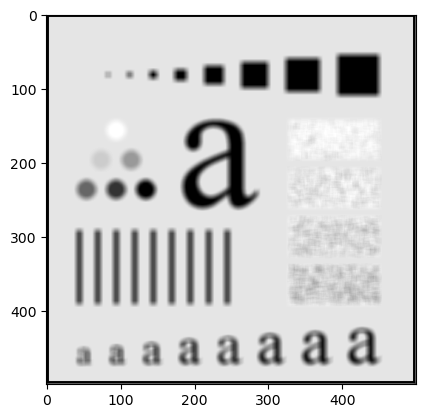

In [28]:
newData = myImgCorrelation(width,height,data,9,9)
plt.imshow(newData,cmap="gray")

### Yukarıdaki görüntü 9x9'luk average filtresiyle elde edilmiştir. Görüntü bulanıklaşmaya başlamıştır.

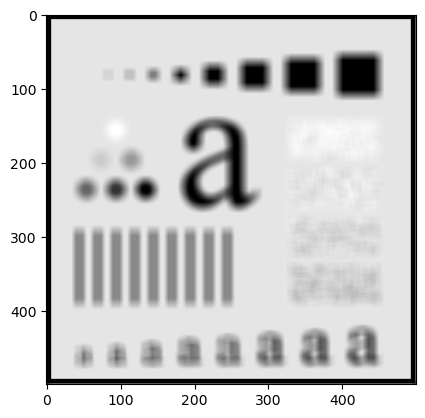

In [29]:
newData = myImgCorrelation(width,height,data,15,15)
plt.imshow(newData,cmap="gray")

### Yukarıdaki görüntü 15x15'lik average filtresiyle elde edilmiştir. Görüntü iyice bulanıklaşmış olup küçük olan siyah kare ve a harflerinin okunması zorlaşmıştır.

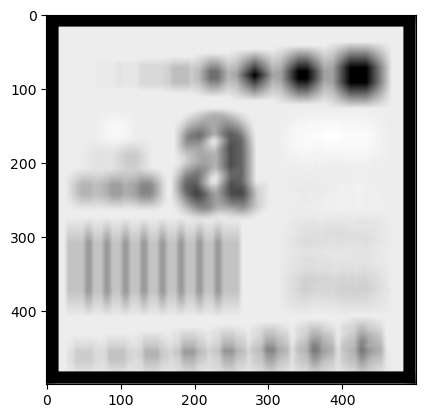

In [31]:
newData = myImgCorrelation(width,height,data,35,35)
plt.imshow(newData,cmap="gray")

### Yukarıdaki görüntü 35x35'lik average filtresiyle elde edilmiştir. Görüntü çok fazla bulanıklaşmıştır ve a harfleri okunmamaya, görüntüdeki gürültülü dikdörtgen kısımlar anlaşılmamaya başlanmıştır.

In [32]:
def myImgCorrelation(width,height,img,m,n):
    mask = np.array([[1 for i in range(n)] for j in range(m)])
    temp = img
    a=(m-1)/2
    b=(n-1)/2
    filteredImg = np.array([[0 for i in range(width)] for j in range(height)])
    
    #Matrisi m ve n değerlerine göre 0 lar ile genişletiyoruz.
    new_column = np.array([0 for i in range(height)]).reshape(height,1)#oluşturulan vektörü sütun vektörü haline getiriyorum.
    for i in range(int(b)*2):#matrisin her tarafı sıfırlarla kaplanması için sütundan ve satırdan b değerinin 2 katı kadar koymalıyız
        temp = np.hstack((temp, new_column))
    
    new_width = len(temp[0])#yukarıda matrise sütun eklendiği için matrisin genişliği değişti. Bu yeni genişliği elde ediyorum.
    new_row = np.array([0 for j in range(new_width)])#Yeni genişlik uzunluğunda 0 satır vektörünü oluşturuyorum.
    for j in range(int(a)*2):#Aynı şekilde matrisin hem üstüne hem altına 0'lar gelmesi için a*2 yapıyorum.
        temp = np.vstack((temp,new_row))
    #Yukarıda eklenen satır ve sütunlar matrisin altına ve sağına eklendiği için tam istediğimiz forma henüz ulaşmamıştır. Bunu
    #istediğimiz forma sokmak için elimizdeki asıl değerleri hem alta hem de sağa doğru o yönde eklediğimiz vektör sayısının
    #yarısı kadar kaydırmamız gerekiyor. Örneğin sağa 2 ve alta 2 vektör eklediysek 1 sağa 1 de aşağı kaydırarak asıl orijinal
    #matrisi merkez kısma yerleştirmiş ve etrafını sıfırlarla kaplamış oluyoruz.
    for i in range(int(a)):
        temp = np.roll(temp, shift=1, axis=0)
        temp = np.roll(temp, shift=1, axis=1)
        
    for i in range(height):
        for j in range(width):
            sum = 0
            for r in range(0,m,1):
                for s in range(0,n,1):
                    sum = sum + mask[r][s]*temp[i+r][j+s]#Artık elimizde padding yapılmış bir matris olduğu için maskeyi
                    #özel şartlar koymadan genişletilmiş matris üstünde gezdirip average işlemini yapabiliriz.
            filteredImg[i][j] = sum/9
    return filteredImg
                    

### Yukarıdaki fonksiyon bu işlemi daha verimli bir şekilde yapmak için daha az if bloğu kullanılarak bir öncekinden farklı bir mantıkla yazılmıştır. Bu fonksiyonda mantık şöyledir, ilk önce fotoğraftan gelen piksel değerleri temp adındaki farklı bir değişkene atılır. Daha sonra bu matris m ve n değerlerine göre 0 lardan oluşan satır ve sütunlarla genişletilir. Bunu yapmamın sebebi, mesela 3x3 lük bir maske kullanacaksak (x,y)=0,0 olan nokta için maskenin bazı pikselleri görüntünün dışında kalmaktadır. Bu dışarıda kalan kısımların olduğu yerleri 0 piksel olarak kabul etmeliyiz. İşte bu yüzden if koşullarıyla bu kritik noktaları teker teker kontrol etmek yerine en baştan matrisi 0 lar ile genişletilmiş şekilde yazarak o matris üzerinden maskeleme işlemini yaparsak bu fazla if bloklarından kurtulmuş oluyoruz. mxn lik bir maske için matrisin soluna ve sağına 0 lardan oluşan (m-1)/2 tane sütun ve matrisin üstüne ve altına da 0 lardan oluşan (n-1)/2 tane satır eklemeliyiz. Kod kısmında bunu yapmak için önce matrise bu satır ve sütunlar matrisin en son kısımlarına vektörler olarak eklendi, daha sonra (m-1)/2 kadar hem yukardan hem aşağıdan elemanlar kaydırılarak istenen matris şekli elde edilmiştir. Artık bu yeni elde edilen matrisin üstünden direk maskeyi kaydırarak kritik noktalara özel olarak dikkat etmeksizin maskeleme işlemi yapılabiliyor. Bu if bloklarından kurtulmanın sonucu olarak 15x15 lik maske 50 saniyede, 35x35 lik maske ise 5 dakikada işlemini bitirmektedir. Bir önceki fonksiyona göre çok daha verimli bir sonuç elde edilmiştir. Ayrıca elde edilen görüntülerin yumuşaklığı da en dıştaki siyah bölgelere bakıldığında kitaptaki şekille birebir aynı olacak şekilde yumuşatılmıştır. Bir önceki fonksiyonla yapılan fotoğraflarda kenarlar da siyahlık buradakine göre daha fazladır.

Text(0.5, 1.0, '3x3 Averaging filter')

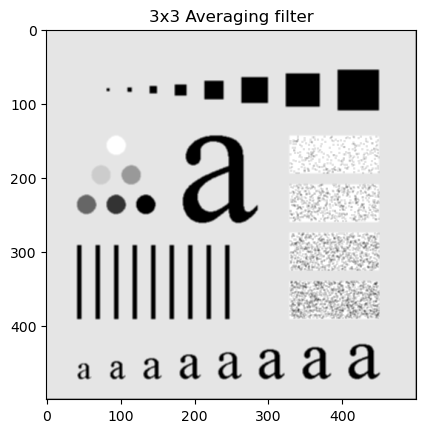

In [33]:
newData = myImgCorrelation(width,height,data,3,3)
plt.imshow(newData,cmap="gray")
plt.title("3x3 Averaging filter")

Text(0.5, 1.0, '5x5 Averaging filter')

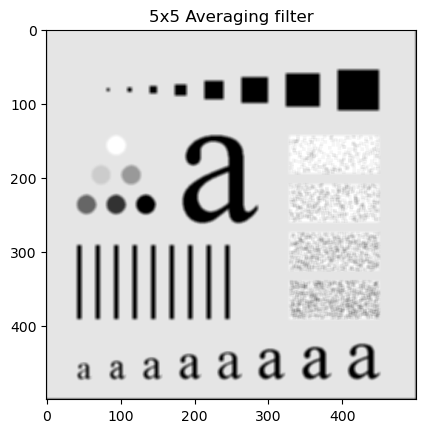

In [34]:
newData = myImgCorrelation(width,height,data,5,5)
plt.imshow(newData,cmap="gray")
plt.title("5x5 Averaging filter")

Text(0.5, 1.0, '9x9 Averaging filter')

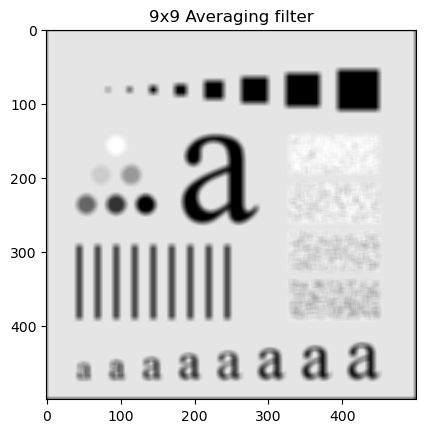

In [35]:
newData = myImgCorrelation(width,height,data,9,9)
plt.imshow(newData,cmap="gray")
plt.title("9x9 Averaging filter")

Text(0.5, 1.0, '15x15 Averaging filter')

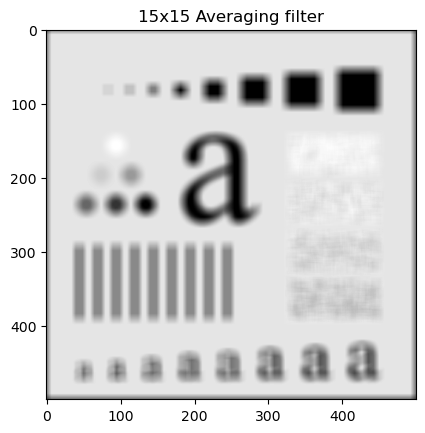

In [36]:
newData = myImgCorrelation(width,height,data,15,15)
plt.imshow(newData,cmap="gray")
plt.title("15x15 Averaging filter")

Text(0.5, 1.0, '35x35 Averaging filter')

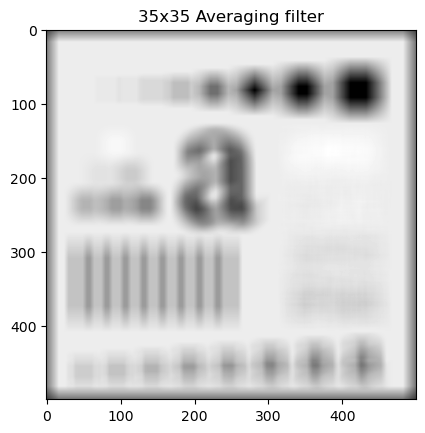

In [37]:
newData = myImgCorrelation(width,height,data,35,35)
plt.imshow(newData,cmap="gray")
plt.title("35x35 Averaging filter")

### Aşağıdaki hücreye son yazdığım fonksiyondaki padding işleminin anlaşılması için rastgele verilerle oluşturulmuş orijinal matrisi, kaydırma işlemi yapılmadan önceki genişletilmiş halini ve kaydırma işlemi yapıldıktan sonra orijinal matrisi merkeze aldığı hali görülmektedir.

In [49]:
width=3
height=3
m=3
n=3
a=(m-1)/2
b=(n-1)/2
temp = np.array([[i+j+1 for i in range(width)] for j in range(height)])
print(f'Padding işleminden önceki orijinal matris\n{temp}')
new_column = np.array([0 for i in range(height)]).reshape(height,1)
for i in range(int(b)*2):
    temp = np.hstack((temp, new_column))
    
new_width = len(temp[0])
new_row = np.array([0 for j in range(new_width)])
for j in range(int(a)*2):
    temp = np.vstack((temp,new_row))
print(f'Kaydırma işlemi yapılmadan önce\n{temp}')
for i in range(int(a)):
    temp = np.roll(temp, shift=1, axis=0)
    temp = np.roll(temp, shift=1, axis=1)
print(f'Kaydırma işlemi yapıldıktan sonra\n{temp}')

Padding işleminden önceki orijinal matris
[[1 2 3]
 [2 3 4]
 [3 4 5]]
Kaydırma işlemi yapılmadan önce
[[1 2 3 0 0]
 [2 3 4 0 0]
 [3 4 5 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
Kaydırma işlemi yapıldıktan sonra
[[0 0 0 0 0]
 [0 1 2 3 0]
 [0 2 3 4 0]
 [0 3 4 5 0]
 [0 0 0 0 0]]


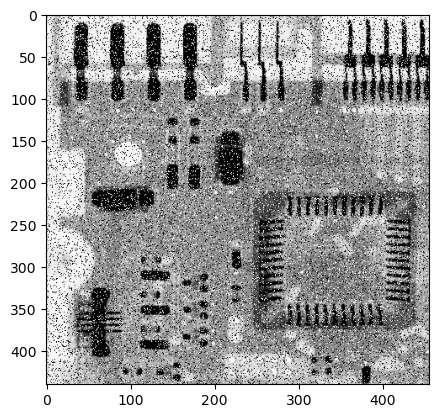

In [39]:
mw,width,height,maxval,data = mypgmread("fig0335.pgm")
plt.imshow(data,cmap="gray")

### Şekil 3.35'in orijinal hali. Salt and pepper denen siyah beyaz gürültüler görüntüde mevcut.

Text(0.5, 1.0, '3x3 Averaging filter')

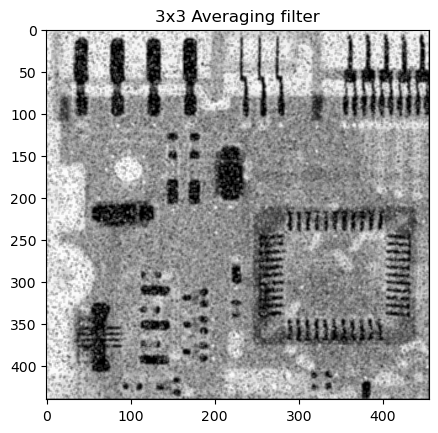

In [40]:
newData = myImgCorrelation(width,height,data,3,3)
plt.imshow(newData,cmap="gray")
plt.title("3x3 Averaging filter")

### Yukarıdaki görüntü şekil 3.35'e 3x3 lük bir average filter uygulandığında elde edilen görüntüdür. Bu filtre görüntüyü bulanıklaştırdı ve siyah beyaz gürültülerden iyi bir şekilde arındıramadı.

In [41]:
def myImgMedian(width,height,img,m,n):

    temp=img
    mask = np.array([[0 for i in range(n)] for j in range(m)])
    a=(m-1)/2
    b=(n-1)/2
    filteredImg = np.array([[0 for i in range(width)] for j in range(height)])
    
    #Matrisi m ve n değerlerine göre 0 lar ile genişletiyoruz.
    new_column = np.array([0 for i in range(height)]).reshape(height,1)
    for i in range(int(b)*2):
        temp = np.hstack((temp, new_column))
    
    new_width = len(temp[0])
    new_row = np.array([0 for j in range(new_width)])
    for j in range(int(a)*2):
        temp = np.vstack((temp,new_row))
    
    for i in range(int(a)):
        temp = np.roll(temp, shift=1, axis=0)
        temp = np.roll(temp, shift=1, axis=1)
        
    for i in range(height):
        for j in range(width):
            for r in range(0,m,1):
                for s in range(0,n,1):
                    mask[r][s] = temp[i+r][j+s]#mask matrisine sırayla merkez ve komşu pikselleri ekliyorum.
            filteredImg[i][j] = statistics.median(mask.reshape(m*n))#mask matrisini m*n lik bir vektör haline getirip medyanını bulup son matrise bu değeri yazdırıyorum.
    return filteredImg

### Bu Medyan filtre fonksiyonu myImgCorrelation fonksiyonu ile çok benzerdir. Burada gene matrisi 0 lar ile genişletiyoruz bu kısımlar aynı. Mask olarak kullandığımız değişkende bu sefer o maskeyi koyduğumuz yerdeki pikselleri saklıyoruz. Daha sonra bu matrisi vektör haline getirip medyan değerini filteredImg matrisine yazdırıyoruz. Tüm piksellerde bu işlemi yaptığımızda medyan filtreleme işlemi tamamlanmış oluyor. Aşağıda siyah beyaz gürültüden arındırılmış görüntü görülmektedir.

Text(0.5, 1.0, '3x3 Median filter')

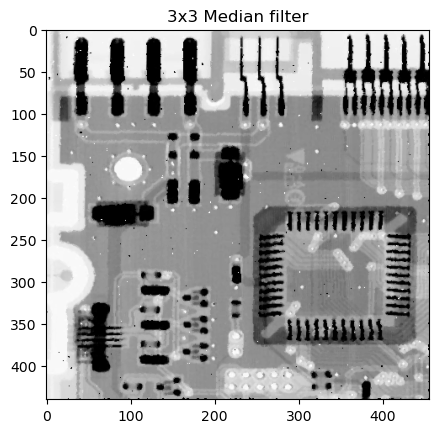

In [42]:
newData = myImgMedian(width,height,data,3,3)
plt.imshow(newData,cmap="gray")
plt.title("3x3 Median filter")

### Yukarıdaki görüntü şekil 3.35'e 3x3'lük medyan filtre uygulandıktan sonra elde edilen görüntüdür. Görüldüğü gibi görüntüyü siyah beyaz gürültüden temiz bir şekilde arındırmıştır. Average filtreye karşı medyan filtrenin bu durumlarda ciddi bir üstünlüğü olduğu görülmektedir.